# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output Files (CSV)
output_data_file = "output_data/cities.csv"
clean_city_data_file = "output_data/cleancitydata.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# this is for practice ONLY api call using just 1 city
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
query_url = url + "&q=" + cities[0]
print(f"City = {cities[0]}")

# Get weather data
weather_response_json = requests.get(query_url).json()
weather_response_json

City = grindavik


{'coord': {'lon': -22.43, 'lat': 63.84},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 48.2,
  'feels_like': 46.08,
  'temp_min': 48.2,
  'temp_max': 48.2,
  'pressure': 1014,
  'humidity': 93},
 'visibility': 10000,
 'wind': {'speed': 2.24, 'deg': 0},
 'clouds': {'all': 90},
 'dt': 1596096581,
 'sys': {'type': 1,
  'id': 90,
  'country': 'IS',
  'sunrise': 1596083683,
  'sunset': 1596148642},
 'timezone': 0,
 'id': 3416888,
 'name': 'Grindavik',
 'cod': 200}

In [4]:
# List for holding latitudes, temperature, humidity, cloudiness, wind speed
# List for countries also included for VacationPy processing
citys = []
countries = []
latitudes = []
longitudes = []
temps = []
humids = []
clouds = []
winds = []

#this counter is used index the city data based on successful calls
city_ctr = 0

# base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# loop through the cities list
for city in cities:
    city_ctr = city_ctr + 1
    query_url = url + "&q=" + city
    print(f"{city_ctr} {city}")
    # Get weather data
    weather_response_json = requests.get(query_url).json()
    try:
        # extract the data from the API response by appending to the corresponding list variable
        citys.append(weather_response_json['name'])
        countries.append(weather_response_json['sys']['country'])
        latitudes.append(weather_response_json['coord']['lat'])
        longitudes.append(weather_response_json['coord']['lon'])
        temps.append(weather_response_json['main']['temp_max'])
        humids.append(weather_response_json['main']['humidity'])
        clouds.append(weather_response_json['clouds']['all'])
        winds.append(weather_response_json['wind']['speed'])
    except:
        # skip the city if not found
        pass

1 grindavik
2 albany
3 busselton
4 cape town
5 port alfred
6 lebu
7 alice springs
8 victoria
9 kodiak
10 daxian
11 dikson
12 tilichiki
13 fukuma
14 thompson
15 mar del plata
16 nizhneyansk
17 luan
18 berlevag
19 alyangula
20 bredasdorp
21 springfield
22 bagdarin
23 ostrovnoy
24 garowe
25 ponta do sol
26 ushuaia
27 amderma
28 salinopolis
29 kapaa
30 severo-yeniseyskiy
31 taolanaro
32 hilo
33 khatanga
34 nanortalik
35 chifeng
36 tomatlan
37 kismayo
38 ola
39 jamestown
40 lavumisa
41 punta arenas
42 rio gallegos
43 fortuna
44 georgetown
45 yellowknife
46 new norfolk
47 steamboat springs
48 arraial do cabo
49 mbanza-ngungu
50 acari
51 talnakh
52 caiaponia
53 jiaocheng
54 iracoubo
55 zhanatas
56 mataura
57 westlake village
58 zhangye
59 kadykchan
60 itaituba
61 bethel
62 nemuro
63 sentyabrskiy
64 hermanus
65 kyshtovka
66 irbil
67 ust-nera
68 fethiye
69 ngukurr
70 tunceli
71 puerto ayora
72 rikitea
73 airai
74 mogadishu
75 castro
76 vezirkopru
77 suluq
78 haines junction
79 acarau
80 qaqorto

623 chicla
624 port keats
625 hvammstangi
626 olafsvik
627 muisne
628 khailar
629 los amates
630 qasigiannguit
631 boma
632 klaksvik
633 lingyuan
634 boende
635 novikovo
636 husavik
637 kincardine
638 maromitsa
639 billings


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a dictionary to contain all the list variables
weather_dict = {
    "city": citys,
    "country": countries,    
    "latitude": latitudes,
    "longitude": longitudes,
    "temp": temps,
    "humid": humids,
    "cloud": clouds,
    "wind": winds
}

# convert the dictionary into a dataframe
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df

,city,country,latitude,longitude,temp,humid,cloud,wind
0,Grindavik,IS,63.84,-22.43,48.20,93,90,2.24
1,Albany,US,42.60,-73.97,69.01,100,31,3.18
2,Busselton,AU,-33.65,115.33,63.00,48,100,8.39
3,Cape Town,ZA,-33.93,18.42,64.00,87,75,3.36
4,Port Alfred,ZA,-33.59,26.89,64.44,59,11,25.77
...,...,...,...,...,...,...,...,...
575,Novikovo,RU,51.15,37.89,72.27,75,99,6.55
576,Husavik,IS,66.04,-17.34,50.00,87,60,5.82
577,Kincardine,GB,56.07,-3.72,53.01,100,75,5.82
578,Maromitsa,RU,59.87,48.01,64.87,97,100,6.06


In [6]:
# write dataframe into a CSV file
weather_data_df.to_csv(output_data_file, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity_lessthan_100_df = weather_data_df[weather_data_df["humid"].astype(float) <= 100]
humidity_lessthan_100_df

,city,country,latitude,longitude,temp,humid,cloud,wind
0,Grindavik,IS,63.84,-22.43,48.20,93,90,2.24
1,Albany,US,42.60,-73.97,69.01,100,31,3.18
2,Busselton,AU,-33.65,115.33,63.00,48,100,8.39
3,Cape Town,ZA,-33.93,18.42,64.00,87,75,3.36
4,Port Alfred,ZA,-33.59,26.89,64.44,59,11,25.77
...,...,...,...,...,...,...,...,...
575,Novikovo,RU,51.15,37.89,72.27,75,99,6.55
576,Husavik,IS,66.04,-17.34,50.00,87,60,5.82
577,Kincardine,GB,56.07,-3.72,53.01,100,75,5.82
578,Maromitsa,RU,59.87,48.01,64.87,97,100,6.06


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100_df = weather_data_df[weather_data_df["humid"].astype(float) > 100]
humidity_over_100_df.index.values

array([], dtype=int64)

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = weather_data_df.drop(humidity_over_100_df.index.values, inplace=False)
clean_city_data_df

,city,country,latitude,longitude,temp,humid,cloud,wind
0,Grindavik,IS,63.84,-22.43,48.20,93,90,2.24
1,Albany,US,42.60,-73.97,69.01,100,31,3.18
2,Busselton,AU,-33.65,115.33,63.00,48,100,8.39
3,Cape Town,ZA,-33.93,18.42,64.00,87,75,3.36
4,Port Alfred,ZA,-33.59,26.89,64.44,59,11,25.77
...,...,...,...,...,...,...,...,...
575,Novikovo,RU,51.15,37.89,72.27,75,99,6.55
576,Husavik,IS,66.04,-17.34,50.00,87,60,5.82
577,Kincardine,GB,56.07,-3.72,53.01,100,75,5.82
578,Maromitsa,RU,59.87,48.01,64.87,97,100,6.06


In [10]:
# Extract relevant fields from the data frame
clean_city_data = clean_city_data_df[["city","country","latitude","longitude","temp","humid","cloud","wind"]]

# Export the City_Data into a CSV
clean_city_data.to_csv(clean_city_data_file, index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
# compute for the current date and convert into mm/dd/yy format
from datetime import date

today = date.today()

currentdate_mmddyy_format = today.strftime("%m/%d/%y")
print("currentdate_mmddyy_format =", currentdate_mmddyy_format)

currentdate_mmddyy_format = 07/30/20


In [12]:
# store dataframe columns into lists for plotting
clean_latitudes = clean_city_data_df["latitude"]
clean_temps = clean_city_data_df["temp"]
clean_humids = clean_city_data_df["humid"]
clean_clouds = clean_city_data_df["cloud"]
clean_winds = clean_city_data_df["wind"]

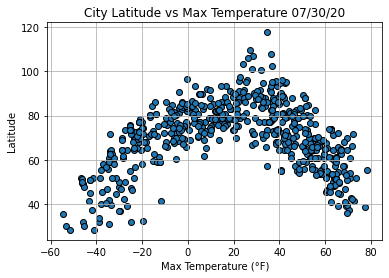

In [13]:
# scatter plot graph of City Latitude vs Max Temperature
plt.scatter(clean_latitudes, clean_temps, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Max Temperature {currentdate_mmddyy_format}")
plt.xlabel("Max Temperature (°F)")
plt.ylabel("Latitude")

plt.savefig("Images/City Latitude vs Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

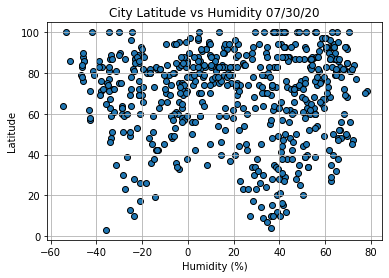

In [15]:
# scatter plot graph of City Latitude vs Humidity 
plt.scatter(clean_latitudes, clean_humids, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Humidity {currentdate_mmddyy_format}")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

plt.savefig("Images/City Latitude vs Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

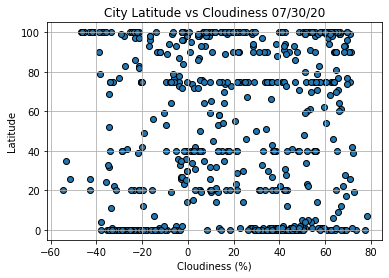

In [16]:
# scatter plot graph of City Latitude vs Cloudiness 
plt.scatter(clean_latitudes, clean_clouds, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Cloudiness {currentdate_mmddyy_format}")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

plt.savefig("Images/City Latitude vs Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

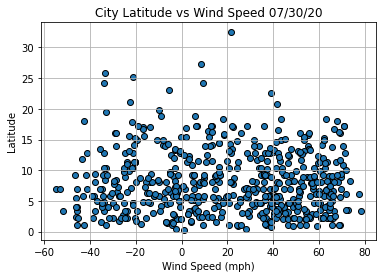

In [17]:
# scatter plot graph of City Latitude vs Wind Speed 
plt.scatter(clean_latitudes, clean_winds, marker="o", edgecolors="black")
plt.grid(True)
plt.title(f"City Latitude vs Wind Speed {currentdate_mmddyy_format}")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")

plt.savefig("Images/City Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots

In [19]:
# create Northern and Southern Hemisphere dataFrames
north_hem_weather_data_df = clean_city_data_df[clean_city_data_df["latitude"].astype(float) >= 0]
south_hem_weather_data_df = clean_city_data_df[clean_city_data_df["latitude"].astype(float) < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

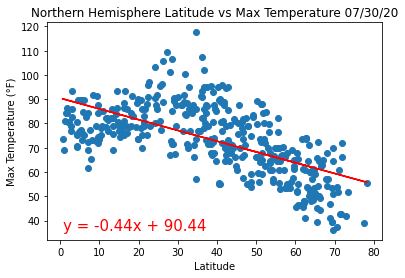

In [20]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitude vs Max Temperature {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')

plt.show()

This figure shows that the higher the latitude, the lower the temperature.
Lower latitudes in the Northern Hemisphere are closer to the equator, therefore the temperature is hotter.



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

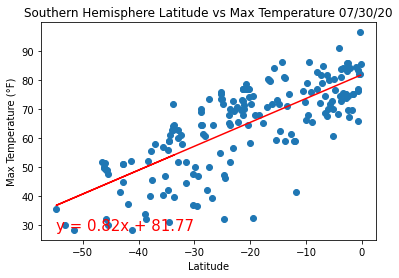

In [21]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitude vs Max Temperature {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')

plt.show()

This figure shows that the higher the latitude, the higher the temperature.
Lower latitudes in the Southern Hemisphere are closer to the South Pole, therefore the temperature is colder.



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

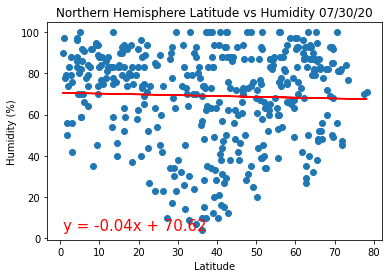

In [22]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["humid"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitude vs Humidity {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()

In the Northern Hemisphere, it is observed that there is a wide range of humidity in lower and higher latitudes.
Middle latitudes (30 to 50), however, have wider range, which are more on the lower humidity level.
 


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

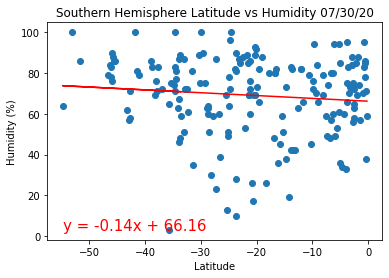

In [23]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["humid"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitude vs Humidity {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()

In the Southern Hemisphere, it is observed that there is a wide range of humidity in higher latitudes; wider range in middle latitudes (-35 to 20) which are more on the lower humidity level. Lowest latitudes (-45 and lower) have high humidity level.



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

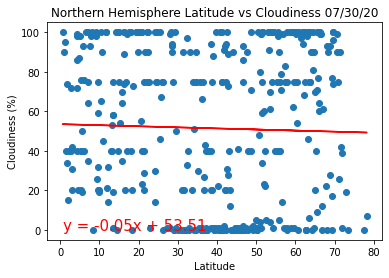

In [24]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["cloud"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitude vs Cloudiness {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

Cloudiness in the Northern Hemisphere is noticeably at a wide range at this time of the year based on this graph. 
The graph also shows a lot of cities with 100% cloudiness in lower and higher latitudes, while 0% cloudiness from middle to higher latitudes.



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

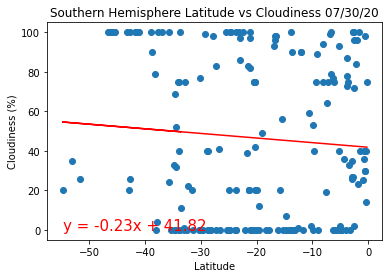

In [25]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["cloud"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitude vs Cloudiness {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

Cloudiness in the Southern Hemisphere is also at a wide range at this time of the year. 
The graph shows cities with 100% cloudiness in different latitudes, while 0% cloudiness from middle to higher latitudes.



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

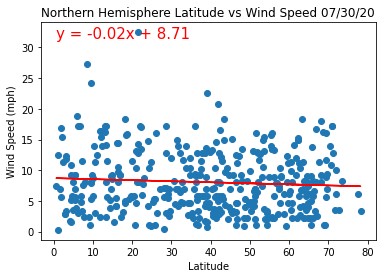

In [26]:
x_values = north_hem_weather_data_df["latitude"]
y_values = north_hem_weather_data_df["wind"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),max(y_values)-1),fontsize=15,color="red")

plt.title(f"Northern Hemisphere Latitude vs Wind Speed {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()

Northern Hemisphere has noticeably a lot larger data with lower wind speed across all latitudes.



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

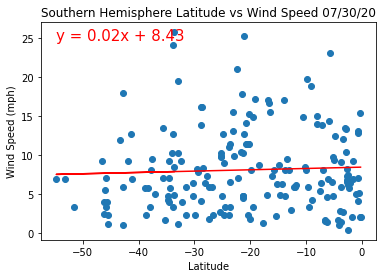

In [27]:
x_values = south_hem_weather_data_df["latitude"]
y_values = south_hem_weather_data_df["wind"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),max(y_values)-1),fontsize=15,color="red")

plt.title(f"Southern Hemisphere Latitude vs Wind Speed {currentdate_mmddyy_format}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()

Southern Hemisphere also has larger data with lower wind speed across all latitudes.

